#  Census Income Project

In [1]:
from IPython.display import Image
Image(url= "http://www.trbimg.com/img-59b86d49/turbine/la-fi-census-poverty-income-20170912")

## Introduction

### Census money income is defined as income received on a regular basis (exclusive of certain money receipts such as capital gains) before payments for personal income taxes, social security, union dues, Medicare deductions, etc.
### This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. The prediction task is to determine whether a person makes over 50K a year.

## Libraries

In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# I have import important libraries for this project in one go so that it will save time.

## Dataset

In [12]:
# Reading the dataset

df = pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# From the dataset i can say that there are few columns in integer and few are in strings.
# All the columns have vital information so i will not be dropping any columns from the dataset.

## EDA - Exploratory Data Analysis

In [3]:
df.shape

(32560, 15)

In [4]:
# There are 32560 rows and 15 columns in the dataset.

In [4]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# It is a mixed dataset as 6 columns are integers type and 9 columns are float type.
# There is no missing values in any columns as count is 32560 for every columns.

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(32536, 15)

In [7]:
# There are few duplicates value in the dataset which got removed.
# Now there are 32536 rows and 15 columns in the dataset.

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
# There are few columns which are categorical in nature and few columns are continous in nature.

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Total number of counts in each columns is matching as there is no missing values.
# The difference between the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

## EDA - Exploratory Data Analysis

### Pair Plot

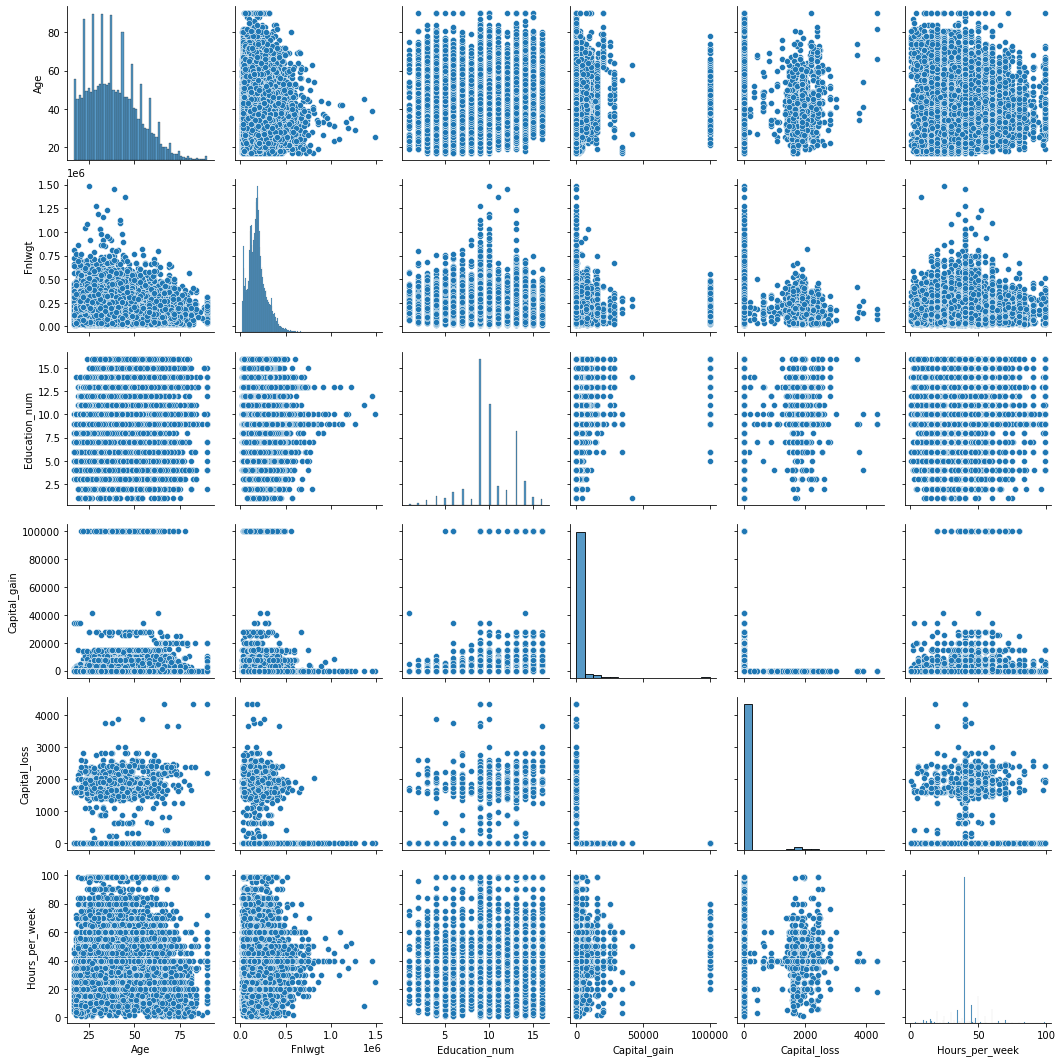

In [11]:
sns.pairplot(df)

In [10]:
# The above pair plot gives us the clear idea that target variable 'Income' are positively corelated with few feature.
# Only few columns are not correlated.

### Heat Map

[]

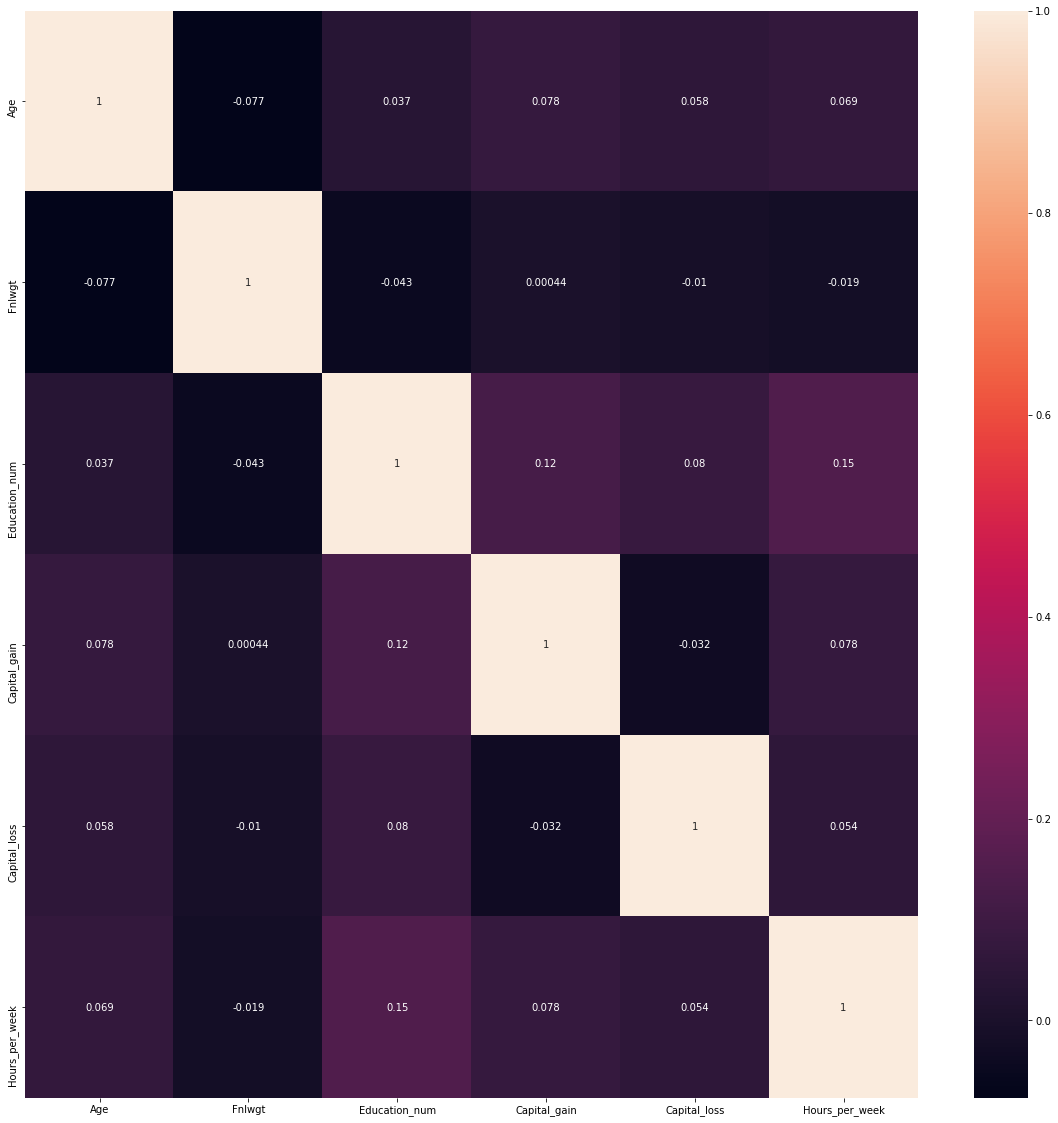

In [13]:
df_cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [14]:
# Education num and capital gain is positively correlated with each other.
# Hours per week and Education num is positively correlated with each other.
# Fnlwgt and Hours per week are negatively correlated to each other.
# Fnlwgt and capital loss are negatively correlated to each other.

### Count Plot

**Income**

In [13]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

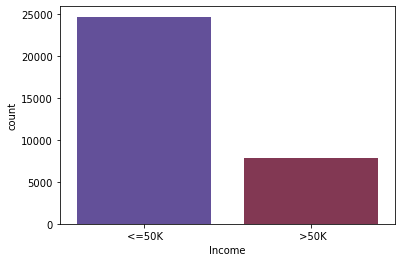

In [14]:
sns.countplot(df['Income'],palette='twilight', data = df);

In [15]:
# There are 24697 people earning less than 50K and 7839 people earning more tha 50K.

**Sex**

In [15]:
df['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

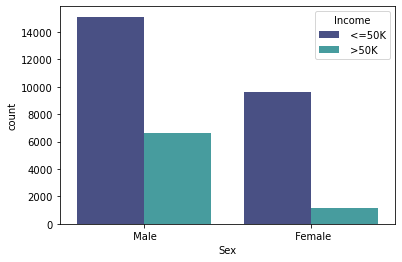

In [17]:
sns.countplot(df['Sex'], palette = 'mako', hue = 'Income', data = df);

In [16]:
# If i campare the income for male and female i can say that most of the mens earning are more than 50K.

**Race**

In [22]:
df['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

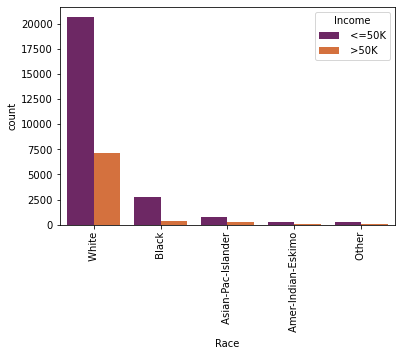

In [23]:
sns.countplot(df['Race'],palette='inferno',hue='Income',data=df);
plt.xticks(rotation=90)

In [17]:
# Since it is the usa dataset so most of the employed people are white and they are enjoying income above 50K.

**Relationship**

In [24]:
df['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

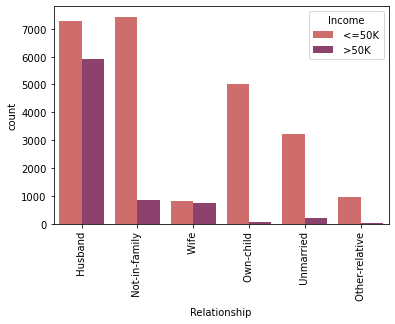

In [25]:
sns.countplot(df['Relationship'],palette='flare',hue='Income',data=df);
plt.xticks(rotation=90)

In [18]:
# Dataset gives me an idea that those who are married husband they are doing well in terms of imcome.
# There income is above 50K.

**Occupation**

In [26]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [27]:
# repalcing the values with mode
df['Occupation'] = df['Occupation'].str.replace('?','Prof-specialty')

In [19]:
# There were '?' in few rows in occupation dataset that was replaced with the help of mode.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

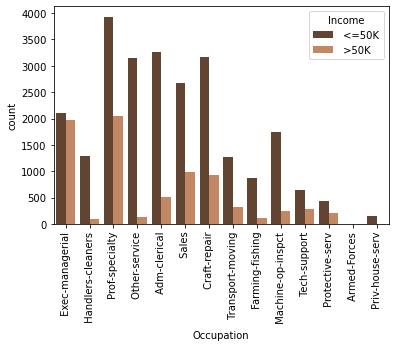

In [28]:
sns.countplot(df['Occupation'],palette='copper',hue='Income',data=df);
plt.xticks(rotation=90)

In [20]:
# Prof-specialty Occupation people are making good income as most of them are earning above 50K.

**Marital_status**

In [29]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

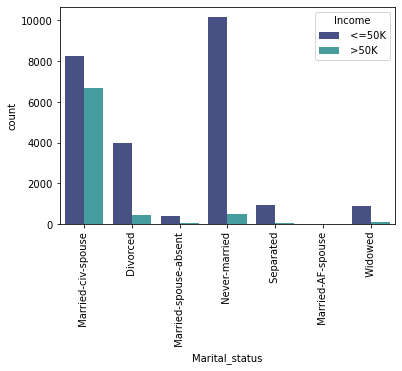

In [30]:
sns.countplot(df['Marital_status'],palette='mako',hue='Income',data=df);
plt.xticks(rotation=90)

In [21]:
# Those people whose Marital_status is Married-civ-spouse are enjoying high income above 50K.

**Workclass**

In [31]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [32]:
# repalcing the values with mode
df['Workclass'] = df['Workclass'].str.replace('?','Private')

In [22]:
# From the WorkClass Column ther are few missing ("?") data which is replaced by the Private attribute.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

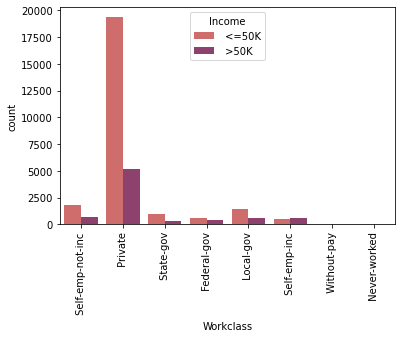

In [33]:
sns.countplot(df['Workclass'],palette='flare',hue='Income',data=df);
plt.xticks(rotation=90)

In [23]:
# Those people who are working is private company are making good income.
# I can say that they have high chance of earning above 50K

### Strip Plot

****Native_country****

In [37]:
df['Native_country'].value_counts()

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [38]:
df['Native_country']=df['Native_country'].str.replace('?','United-States')

<AxesSubplot:xlabel='Income', ylabel='Native_country'>

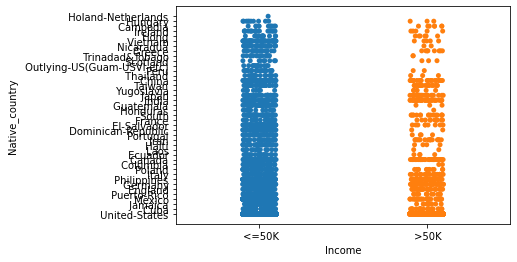

In [47]:
sns.stripplot(df['Income'],df['Native_country'])

In [24]:
# There are 3 countries like USA, Mexico and Philippines people who are making good income i.e above 50K.

### Bar Plot

### Capital_gain

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

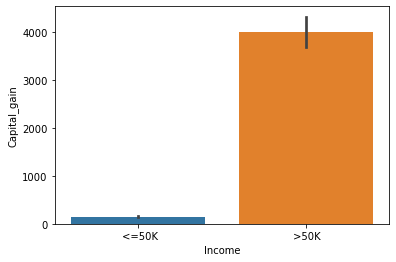

In [50]:
sns.barplot(df['Income'],df['Capital_gain'])

In [25]:
# Those people whose capital gain approx 4000 there income is above 50K.

### Capital_loss

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

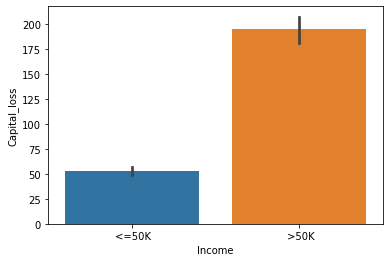

In [51]:
sns.barplot(df['Income'],df['Capital_loss'])

In [26]:
# Those people whose capital loss approx 50 there income is below 50K.

### Hours_per_week

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

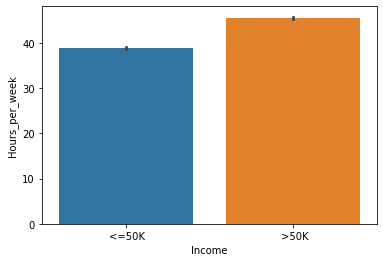

In [53]:
sns.barplot(df['Income'],df['Hours_per_week'])

In [27]:
# Those who are working more than 40 hours are earning greater than 50K.

## Label Encoder

In [54]:
le = LabelEncoder()
df.Workclass = le.fit_transform(df.Workclass)
df.Education = le.fit_transform(df.Education)
df.Marital_status = le.fit_transform(df.Marital_status)
df.Occupation = le.fit_transform(df.Occupation)
df.Relationship = le.fit_transform(df.Relationship)
df.Race = le.fit_transform(df.Race)
df.Sex = le.fit_transform(df.Sex)
df.Native_country = le.fit_transform(df.Native_country)
df.Income = le.fit_transform(df.Income)

In [28]:
# I have used label encoder to convert the strings values into intergers.
# It will help me in model building.

## Distribution Plot

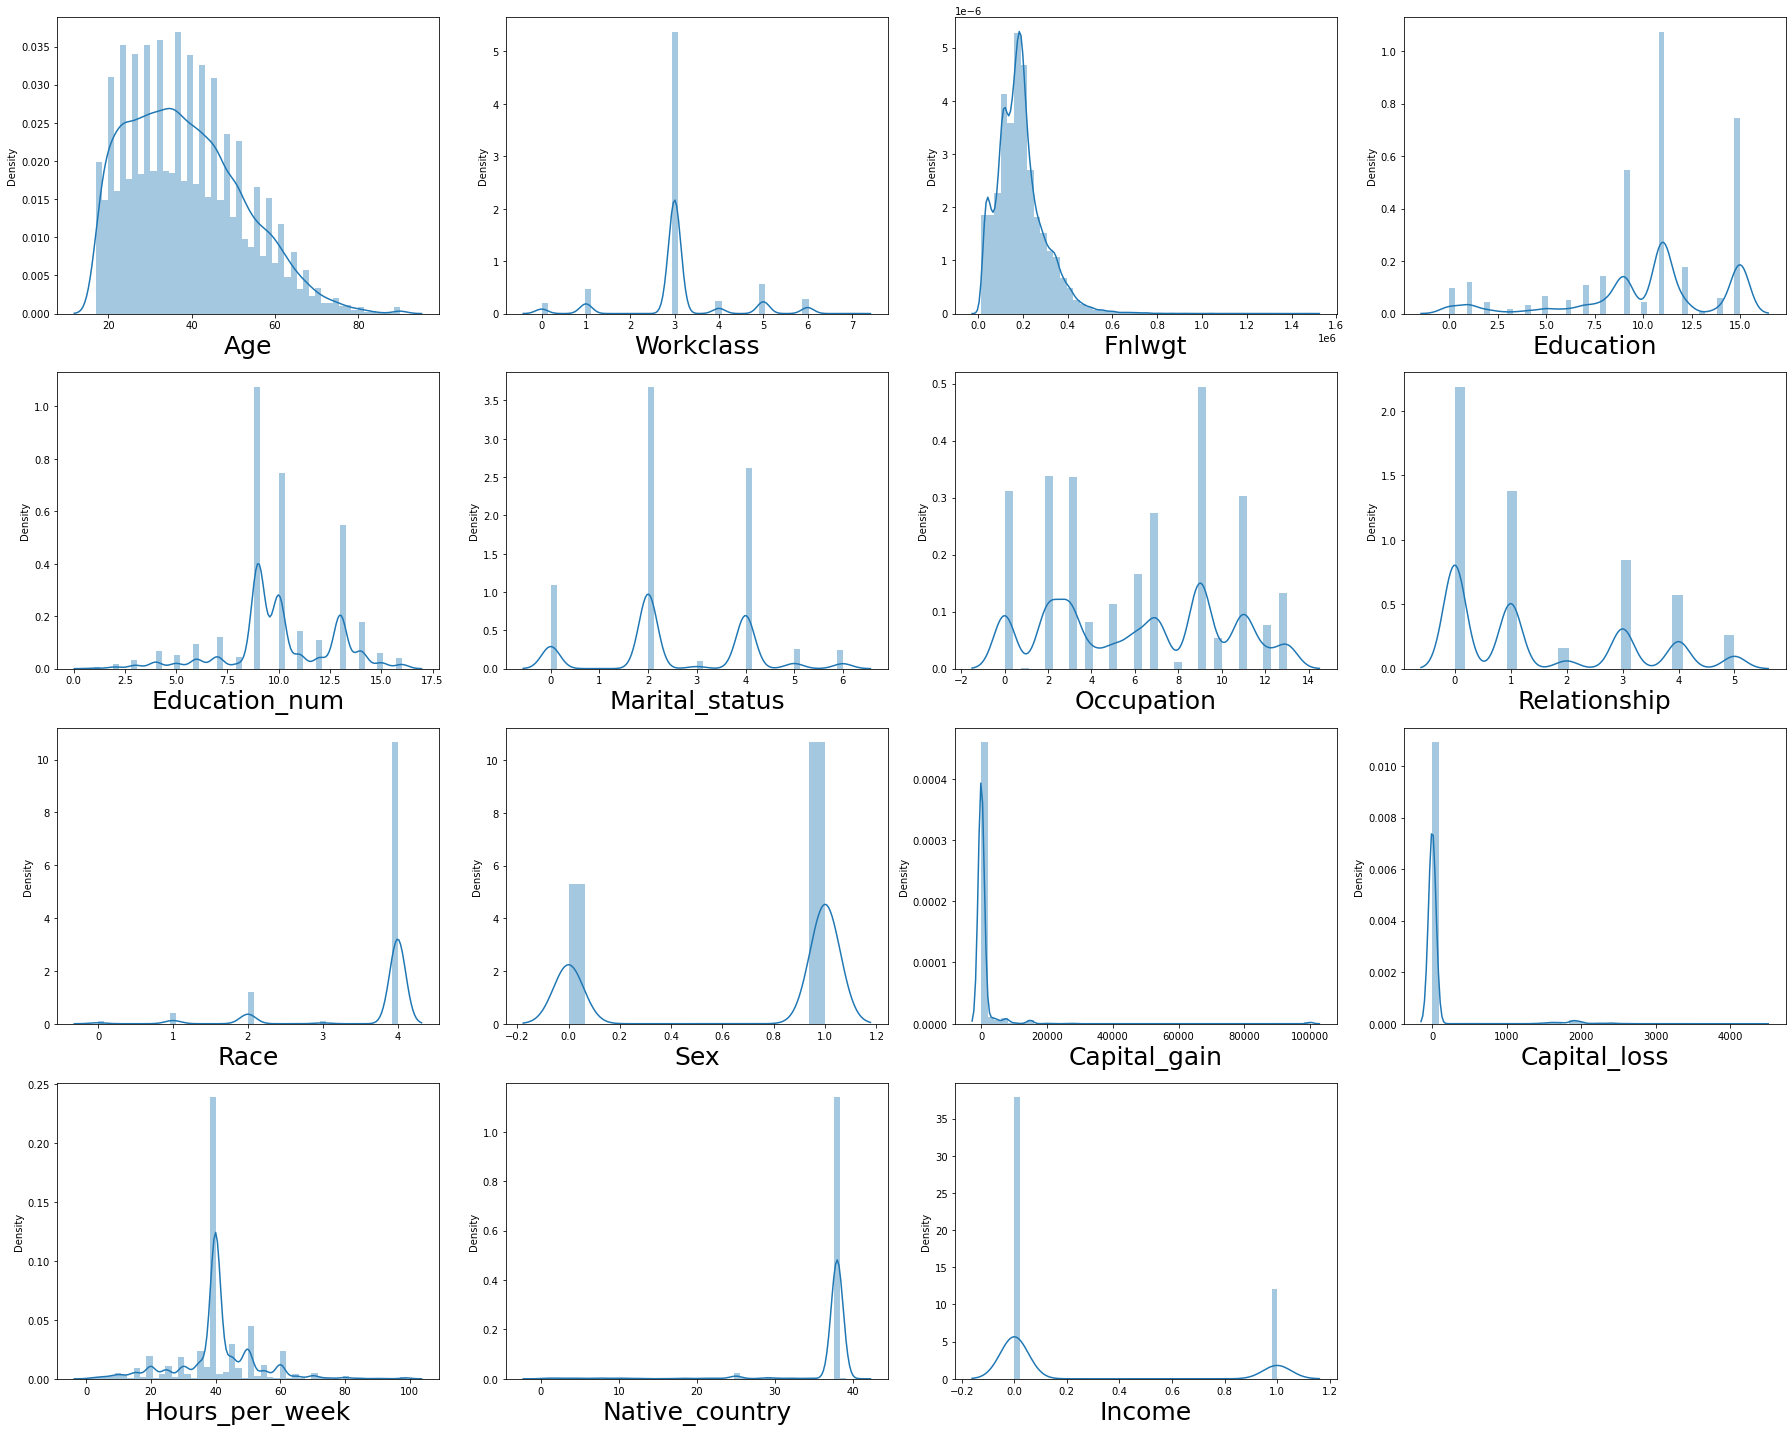

In [58]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [29]:
# There are skewness in the dataset which i will remove soon.
# There are few zero values as well that also need to be taken care.

## Replacing all the zero values from different columns

In [59]:
# Replacing categorial columns with mode
df['Workclass']=df['Workclass'].replace(0,df['Workclass'].mode()[0])
df['Education']=df['Education'].replace(0,df['Education'].mode()[0])
df['Marital_status']=df['Marital_status'].replace(0,df['Marital_status'].mode()[0])
df['Occupation']=df['Occupation'].replace(0,df['Occupation'].mode()[0])
df['Relationship']=df['Relationship'].replace(0,df['Relationship'].mode()[0])
df['Race']=df['Race'].replace(0,df['Race'].mode()[0])
df['Native_country']=df['Native_country'].replace(0,df['Native_country'].mode()[0])
df['Income']=df['Income'].replace(0,df['Income'].mode()[0])

In [30]:
# There are few zero values that got replaced with the help of mode.

## Box Plot

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hours_per_week          AxesSubplot(0.125,0.125;0.168478x0.16413)
Native_country       AxesSubplot(0.327174,0.125;0.168478x0.16413)
Income               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: obj

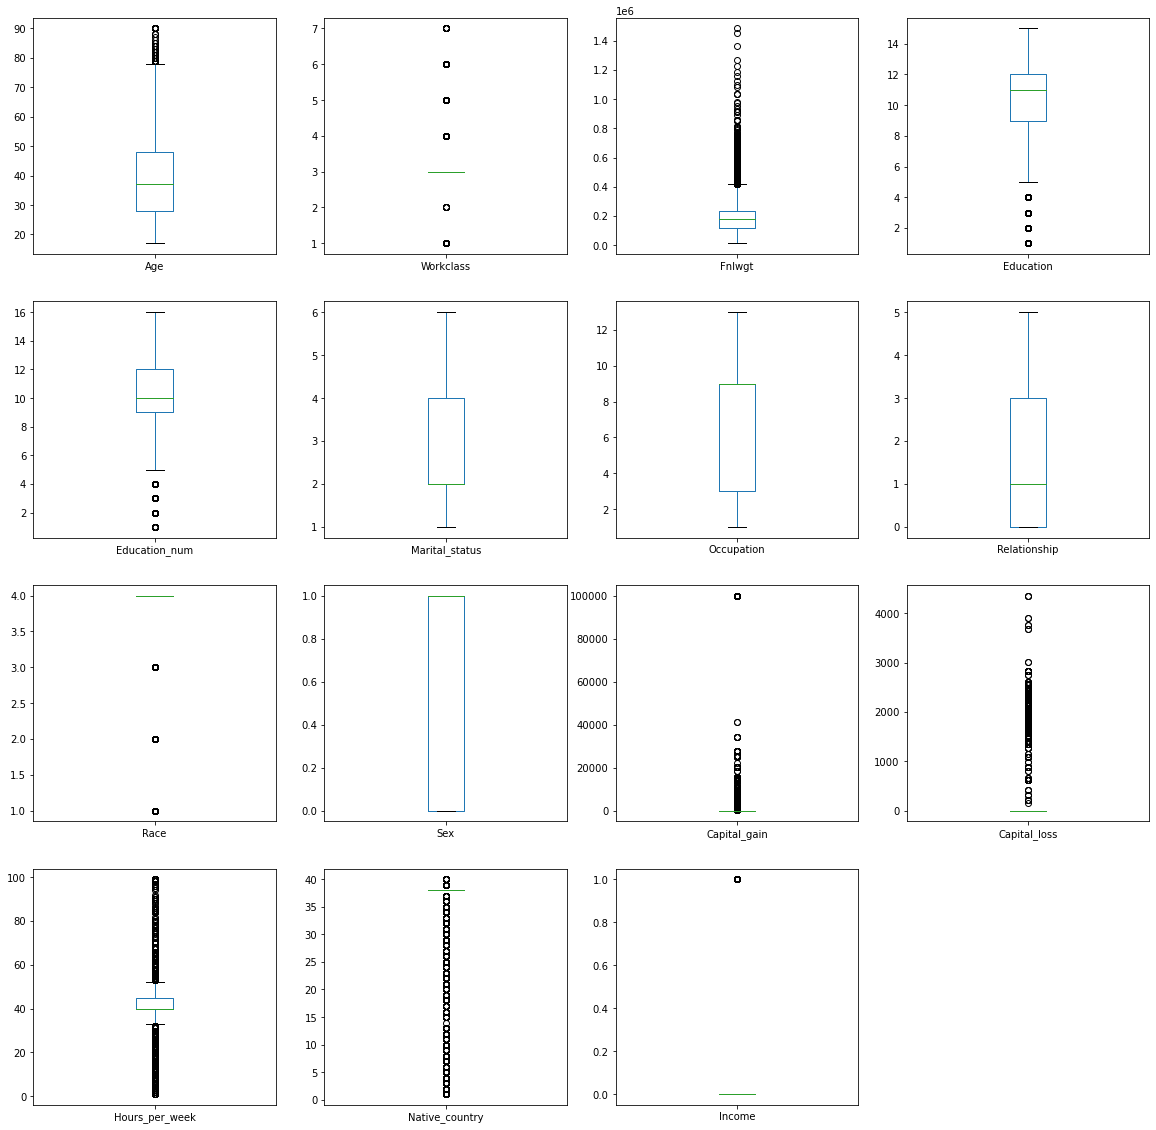

In [60]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

In [31]:
# There are outliers in the dataset that i will remove it with the help of z score.

## Z score

In [61]:
z_score = zscore(df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week','Native_country']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000
mean,38.156412,3.174553,185023.203490,10.631544,10.035042,2.901014,7.185176,1.475857,3.717148,0.661999,569.017383,1.206491,39.897841,37.423053,0.222218
std,13.382662,0.965511,94786.735379,3.454294,2.493010,1.146345,3.359864,1.607994,0.748314,0.473037,2328.770356,32.553739,11.151316,2.658327,0.415744
min,17.000000,1.000000,12285.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,19.000000,0.000000
25%,27.000000,3.000000,117258.000000,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177461.000000,11.000000,10.000000,2.000000,9.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234193.750000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,7.000000,506436.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,40.000000,1.000000


In [62]:
df.shape

(28994, 15)

In [32]:
# I have applied z score to clean the dataset so that outliers will be removed and model accuracy can be improved.
# Now there are 28994 rows and 15 columns in the dataset.

## Distribution Plot 

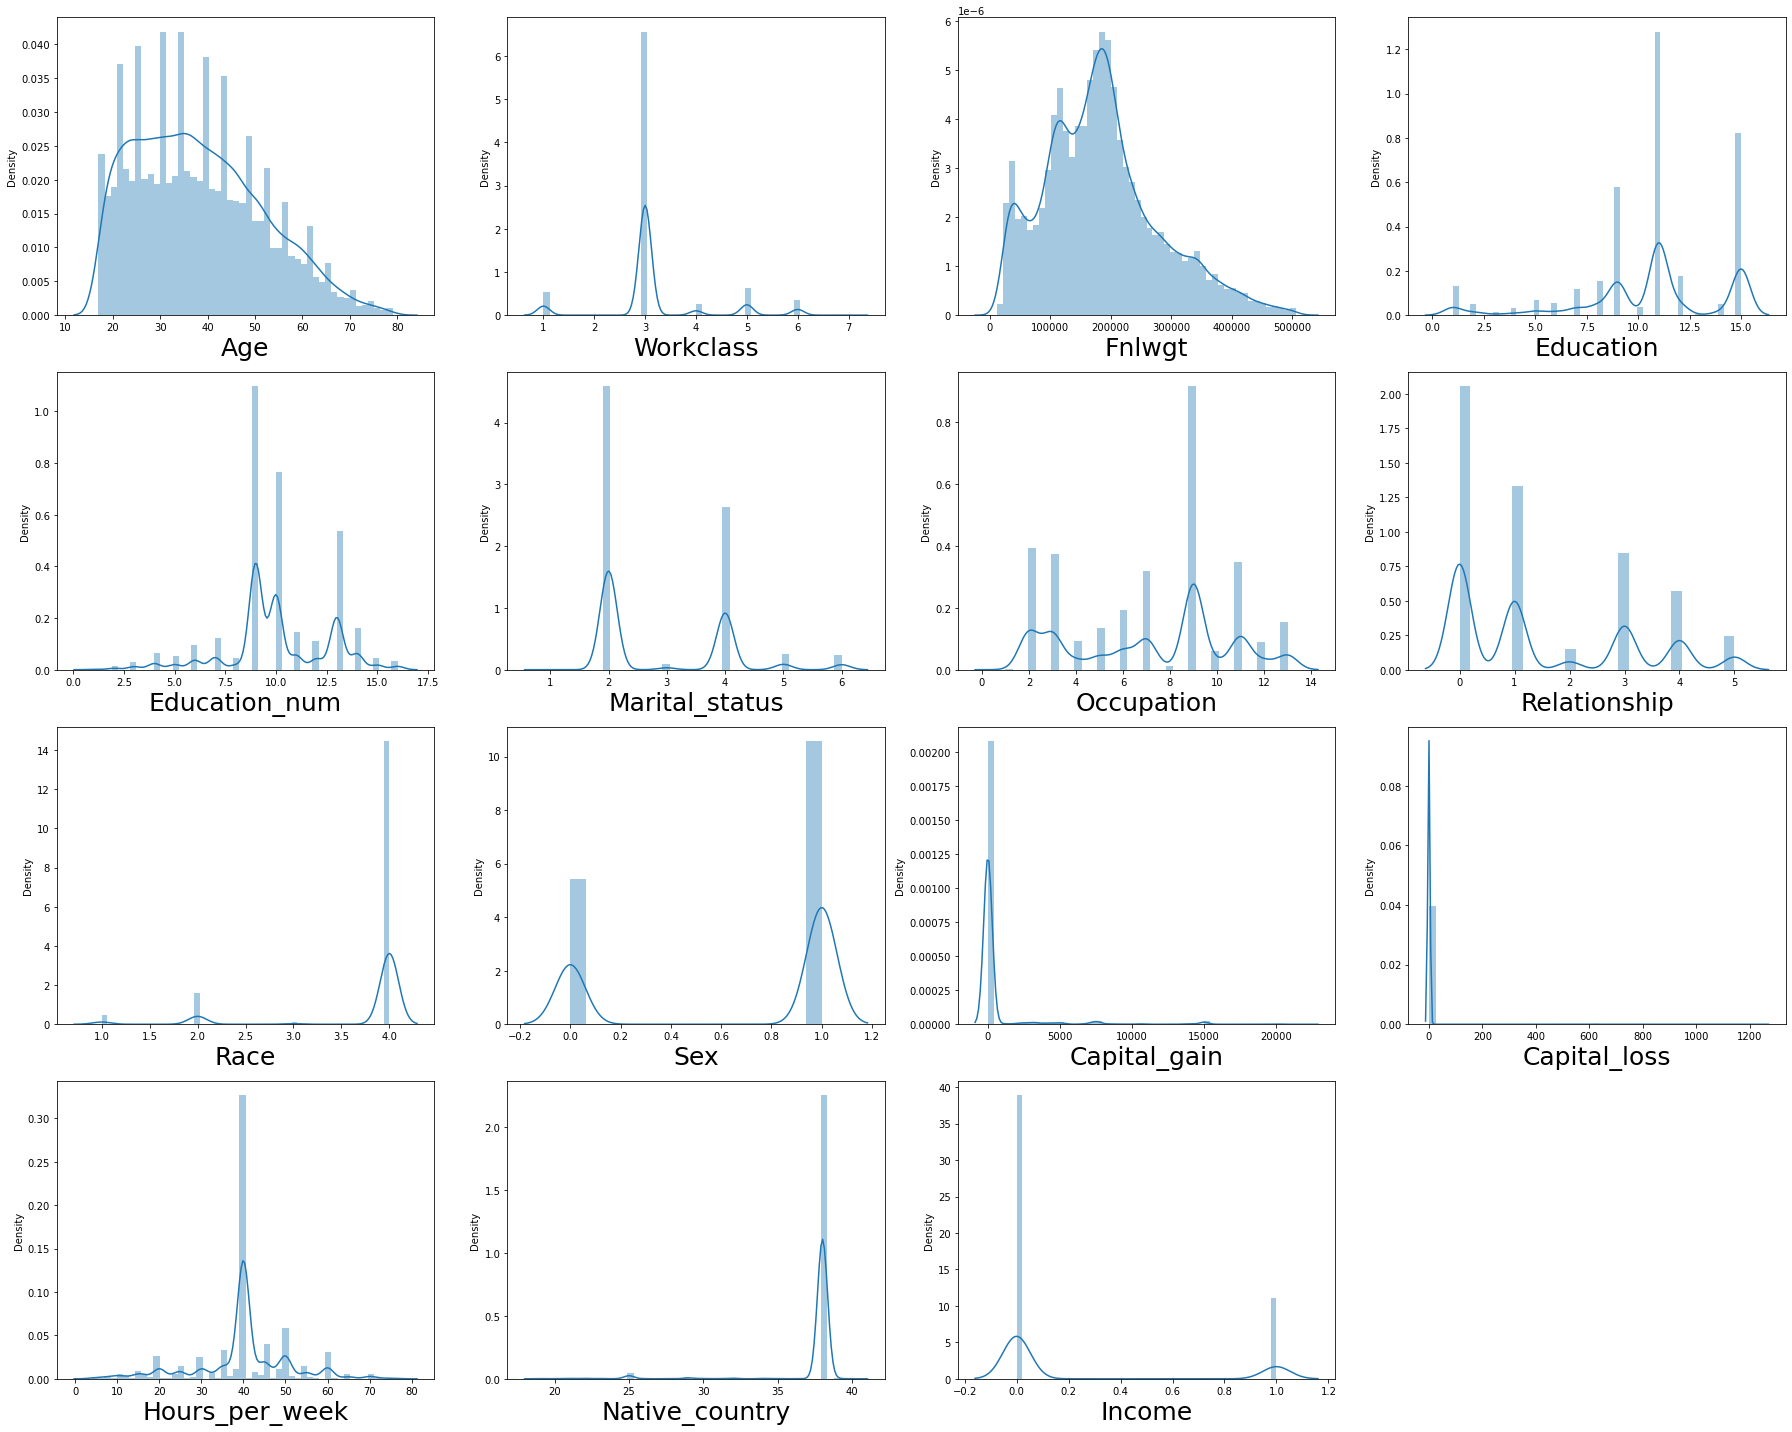

In [63]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [33]:
# Now from the distribution plot i can say that dataset is less skewned and outliers is also removed.

### Visualize the correlation

In [64]:
# find correlation of features vs target using corrwith

df.drop('Income',axis=1).corrwith(df.Income)

Age               0.238319
Workclass         0.025121
Fnlwgt           -0.009669
Education         0.042677
Education_num     0.316747
Marital_status   -0.332273
Occupation       -0.037732
Relationship     -0.246150
Race              0.070889
Sex               0.209361
Capital_gain      0.343612
Capital_loss     -0.016482
Hours_per_week    0.231524
Native_country    0.042265
dtype: float64

### correlation

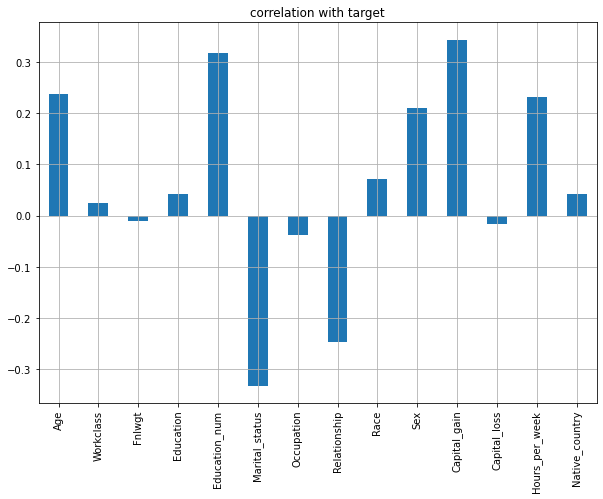

In [65]:
df.drop('Income',axis=1).corrwith(df.Income).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [34]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

# Machine Learning

In [66]:
x = df.drop('Income',axis=1)
y = df.Income

In [35]:
# I have divided dataset into feature and label.

## StandardScaler

In [67]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.88501024,  1.89068677, -1.07308219, ..., -0.03706216,
        -2.41211924,  0.21703764],
       [-0.01168784, -0.18079177,  0.32307606, ..., -0.03706216,
         0.00916132,  0.21703764],
       [ 1.10918476, -0.18079177,  0.52432076, ..., -0.03706216,
         0.00916132,  0.21703764],
       ...,
       [ 1.48280896, -0.18079177, -0.3493503 , ..., -0.03706216,
         0.00916132,  0.21703764],
       [-1.20728527, -0.18079177,  0.17372769, ..., -0.03706216,
        -1.78437983,  0.21703764],
       [ 1.03445992,  0.8549475 ,  1.08565371, ..., -0.03706216,
         0.00916132,  0.21703764]])

In [36]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [68]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.167447,Age
1,1.015533,Workclass
2,1.020206,Fnlwgt
3,1.076017,Education
4,1.153503,Education_num
5,1.277280,Marital_status
6,1.049788,Occupation
7,1.706783,Relationship
8,1.040987,Race
9,1.591624,Sex


In [ ]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that none of the features are highly intercorrelated it means Multicollinearity doesn't exist.

## Model Building

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [37]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Logistic Regression

In [70]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred = log_reg.predict(x_test)

In [72]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5320,  337],
       [ 868,  724]], dtype=int64)

In [73]:
log_reg.score(x_test,y_test)

0.8337701751965788

In [74]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8337701751965788

In [75]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5657
           1       0.68      0.45      0.55      1592

    accuracy                           0.83      7249
   macro avg       0.77      0.70      0.72      7249
weighted avg       0.82      0.83      0.82      7249



In [38]:
# Logistic Regression accuracy score 83%

### Auc Score

In [76]:
# Logistic Regression
roc_auc_score(y_test,log_reg.predict(x_test))

0.6976008289636266

## KNN 

### Using SelectKBest Method for best features selection

In [77]:
best_features = SelectKBest(score_func=f_classif,k=12)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(12,'Score'))

     Features_Name        Score
10    Capital_gain  3881.328010
5   Marital_status  3598.113210
4    Education_num  3233.100708
7     Relationship  1869.925953
0              Age  1745.775689
12  Hours_per_week  1642.097414
9              Sex  1329.028679
8             Race   146.427291
3        Education    52.901396
13  Native_country    51.881087
6       Occupation    41.334516
1        Workclass    18.306848


In [78]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [79]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5138,  519],
       [ 701,  891]], dtype=int64)

In [80]:
knn.score(x_test,y_test)

0.8317009242654159

In [81]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8317009242654159

In [82]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5657
           1       0.63      0.56      0.59      1592

    accuracy                           0.83      7249
   macro avg       0.76      0.73      0.74      7249
weighted avg       0.83      0.83      0.83      7249



## Let use Grid search CV for the best parameter to improve the accuracy

In [83]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [84]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [85]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [87]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [88]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [90]:
y_pred = knn.predict(x_test)

In [91]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5162,  495],
       [ 694,  898]], dtype=int64)

In [92]:
knn.score(x_test,y_test)

0.8359773761898193

In [93]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8359773761898193

In [94]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5657
           1       0.64      0.56      0.60      1592

    accuracy                           0.84      7249
   macro avg       0.76      0.74      0.75      7249
weighted avg       0.83      0.84      0.83      7249



In [39]:
# In KNN algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving the accuracy score by 1%.
# KNN Accuracy Score 84%.

###  Auc Score

In [95]:
# KNN 
roc_auc_score(y_test,knn.predict(x_test))

0.7382840710535175

## RandomForestClassifier

In [97]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [98]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5251,  406],
       [ 668,  924]], dtype=int64)

In [99]:
rfc.score(x_test,y_test)

0.851841633328735

In [100]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.851841633328735

In [101]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5657
           1       0.69      0.58      0.63      1592

    accuracy                           0.85      7249
   macro avg       0.79      0.75      0.77      7249
weighted avg       0.84      0.85      0.85      7249



## Let use Grid search CV for the best parameter to improve the accuracy

In [102]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [103]:
rfc = grd.best_estimator_

In [104]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [105]:
y_pred = rfc.predict(x_test)

In [106]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5416,  241],
       [ 825,  767]], dtype=int64)

In [107]:
rfc.score(x_test,y_test)

0.8529452338253553

In [108]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8529452338253553

In [109]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5657
           1       0.76      0.48      0.59      1592

    accuracy                           0.85      7249
   macro avg       0.81      0.72      0.75      7249
weighted avg       0.84      0.85      0.84      7249



In [40]:
# In Random forest algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is neither improving  nor reducing the accuracy score.
# Random forest Accuracy Score 85%.

### Auc Score

In [110]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7195909168433647

## Decision Tree Classifier

In [111]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [112]:
y_pred = log_reg.predict(x_test)

In [113]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5320,  337],
       [ 868,  724]], dtype=int64)

In [114]:
dtc.score(x_test,y_test)

0.8046627120982205

In [115]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8337701751965788

In [116]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5657
           1       0.68      0.45      0.55      1592

    accuracy                           0.83      7249
   macro avg       0.77      0.70      0.72      7249
weighted avg       0.82      0.83      0.82      7249



## Let use Grid search CV for the best parameter to improve the accuracy

In [117]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [118]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [119]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [120]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [121]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=7,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [122]:
y_pred = dtc.predict(x_test)

In [123]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5409,  248],
       [ 833,  759]], dtype=int64)

In [124]:
dtc.score(x_test,y_test)

0.8508759828941923

In [125]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8508759828941923

In [126]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5657
           1       0.75      0.48      0.58      1592

    accuracy                           0.85      7249
   macro avg       0.81      0.72      0.75      7249
weighted avg       0.84      0.85      0.84      7249



In [ ]:
# In Decision Tree Classifier algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving the accuracy score by 2%.
# Decision Tree Classifier Score 85%.

#### Below is the Auc Score:    

In [127]:
# Decision Tree Classifier
roc_auc_score(y_test,dtc.predict(x_test))

0.7164596515368072

## Roc_Auc Curve

In [43]:
from IPython.display import Image
Image(url= "https://cdn-images-1.medium.com/max/2000/1*q8VdYJGRO9RWbLi1TVeTuQ.jpeg")

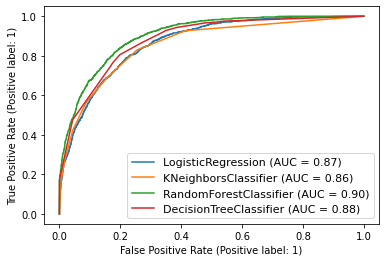

In [128]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Saving the Best Model

In [129]:
import pickle

In [130]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [42]:
from IPython.display import Image
Image(url= "https://dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg")

In [41]:
# The best model is Random Forest classifier whose accuracy score is 85%